# Machine Learning - IN221 - February 2025
## Eng. Ahmed Métwalli
## Week 2 - Hands-on Coding

<img src = 'Images/datasc-660x434.png'>

## [View Section: Linear Regression Guidelines](SecWeek2_LinearRegression.pdf)

# Getting started with Data Scient Lifecycle coding

## Importing Packages

In [55]:
# Pandas > Data manipulation
# Import Numpy (Numerical operations)
# Matplotlib for visualization
 # How to visualize data (matplotlib.pyplot and seaborn)
import pandas as pd # data manipulation
import numpy as np # numerical computation

## Importing Covid-19 Dataset

In [56]:
# Filename
file_name = "Public Datasets/covid_19_clean_complete.csv.zip" # The file of the dataset

In [57]:
df = pd.read_csv(file_name, compression='zip') # The dataframe to be imported

### Objective: Our aim is to predict the amount of death in the next days or weeks.

## Data & Business Understanding

In [58]:
df.info() # To view information about each attribute
# Number of non-null items
# Datatype of each feature
# Shape of the data (RangeIndex > number or rows, Columns)
# Memory Usage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [69]:
df['Date'] = pd.to_datetime(df['Date'])

- Province/State: It contains the province and state of record.
- Country/Region: This is the country and the region of a record
- Lat: The lattitude of the region/country
- Long: The longitude of the region/country
- Date: The date at which that record has occured
- Confirmed: The number of people per day confirmed to be having covid 19
- Deaths: The number of deaths per day by covid 19
- Recovered: The number of recovered from covid 19 per day
- Active: The number of active cases (still having covid till that day)
- WHO Region: World health organization region of the record

Issue:
- The province/State contains may nulls more than 30000
- The Date column should be datetime format (df['Date'] > should be datetime format)

'Australian Capital Territory'

In [63]:
df['Province/State'] = df['Province/State'].fillna(df['Province/State'].describe()['top'])

In [ ]:
df.describe() # Descriptive statistics of data

,Lat,Long,Confirmed,Deaths,Recovered,Active
count,49068.000000,49068.000000,4.906800e+04,49068.000000,4.906800e+04,4.906800e+04
mean,21.433730,23.528236,1.688490e+04,884.179160,7.915713e+03,8.085012e+03
std,24.950320,70.442740,1.273002e+05,6313.584411,5.480092e+04,7.625890e+04
min,-51.796300,-135.000000,0.000000e+00,0.000000,0.000000e+00,-1.400000e+01
25%,7.873054,-15.310100,4.000000e+00,0.000000,0.000000e+00,0.000000e+00
50%,23.634500,21.745300,1.680000e+02,2.000000,2.900000e+01,2.600000e+01
75%,41.204380,80.771797,1.518250e+03,30.000000,6.660000e+02,6.060000e+02
max,71.706900,178.065000,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06


Insights:
- We saw that the highest number of death per day was 148011
- Confirmed > Mean of confirmed covid-19 is 10x higher of Q3 (third quartile 75% data)
- Same with Recovered 
- What does the negative in Long or Lat represent?
    - Because Longitude/Lattitude are the positions with respect to region (- or +ve location) 
- Confirmed Mean >> Median

In [6]:
df['Province/State'].isna().sum()

34404

## Data Preparation

- Solving issue 1: Droping column of province/state

In [7]:
df.isna().sum() # View the number of missing values

Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64

Province/State contains many nulls 34404 out 49068, therefore we can drop it or dive deeper to understand the existing non-missing values.

In [36]:
df.drop(labels = 'Province/State',
        axis=1,
        inplace = True) # Axis = 1 (dropping a column) - inplace = True (Commit)

In [37]:
df.isna().sum() # Now we should have no nulls

Country/Region    0
Lat               0
Long              0
Date              0
Confirmed         0
Deaths            0
Recovered         0
Active            0
WHO Region        0
dtype: int64

In [39]:
df.duplicated().sum()

0

# Lab Week3: Continue DS LifeCycle

In [10]:
df['Date'] = pd.to_datetime(df['Date'])

- Solving issue 2: Converting date to datetime column

In [11]:
df['Date'] = pd.to_datetime(df['Date']) # pd.to_datetime(Series)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Country/Region  49068 non-null  object        
 1   Lat             49068 non-null  float64       
 2   Long            49068 non-null  float64       
 3   Date            49068 non-null  datetime64[ns]
 4   Confirmed       49068 non-null  int64         
 5   Deaths          49068 non-null  int64         
 6   Recovered       49068 non-null  int64         
 7   Active          49068 non-null  int64         
 8   WHO Region      49068 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(2)
memory usage: 3.4+ MB


In [13]:
df.duplicated().sum()

0

## Data visualization

### EDA: Univariate, Bivariate and Multivariate Exploration
- Univariate Exploration: Explore a single feature
- Bivariate Exploration: Exploring two features and study their relation
- Multivariate Exploration: Exploring multiple features > 2 togehter 

Here we will use some plottings to explore the data visually

- Q&A:
    - PairPlot is a bivariate exploration for each variable with another in each cell

- Q&A: 
    - What is that shape of the pairgrid?
        - Our objective is to plot numerical features in a grid

#### Import the packages of the plotting

In [14]:
import matplotlib.pyplot as plt # For data visualization
import seaborn as sns # For data visualization

#### Let's first plot all relations together, and pick the important relations by eyes and document them

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Country/Region  49068 non-null  object        
 1   Lat             49068 non-null  float64       
 2   Long            49068 non-null  float64       
 3   Date            49068 non-null  datetime64[ns]
 4   Confirmed       49068 non-null  int64         
 5   Deaths          49068 non-null  int64         
 6   Recovered       49068 non-null  int64         
 7   Active          49068 non-null  int64         
 8   WHO Region      49068 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(2)
memory usage: 3.4+ MB


In [16]:
df.select_dtypes(['int64','float64']).columns

Index(['Lat', 'Long', 'Confirmed', 'Deaths', 'Recovered', 'Active'], dtype='object')

In [17]:
import seaborn as sb
import matplotlib.pyplot as plt

- Q&A:
    - PairGrid vs Plot - Done
    - Why Long and Lattitude looks like this?
        - Because there are no correlation between them hence, it looks like it is random.
    - Why we have duplicate figures?
        - The change of the axis (Ex: Death vs Confirmed first time we have Death on X axis, second time Confirmed in X axis)
    - Why are the diagonal scatters having perfect linear relation?
        - Because this is the relation between the feature itself (Autocorrelation) 

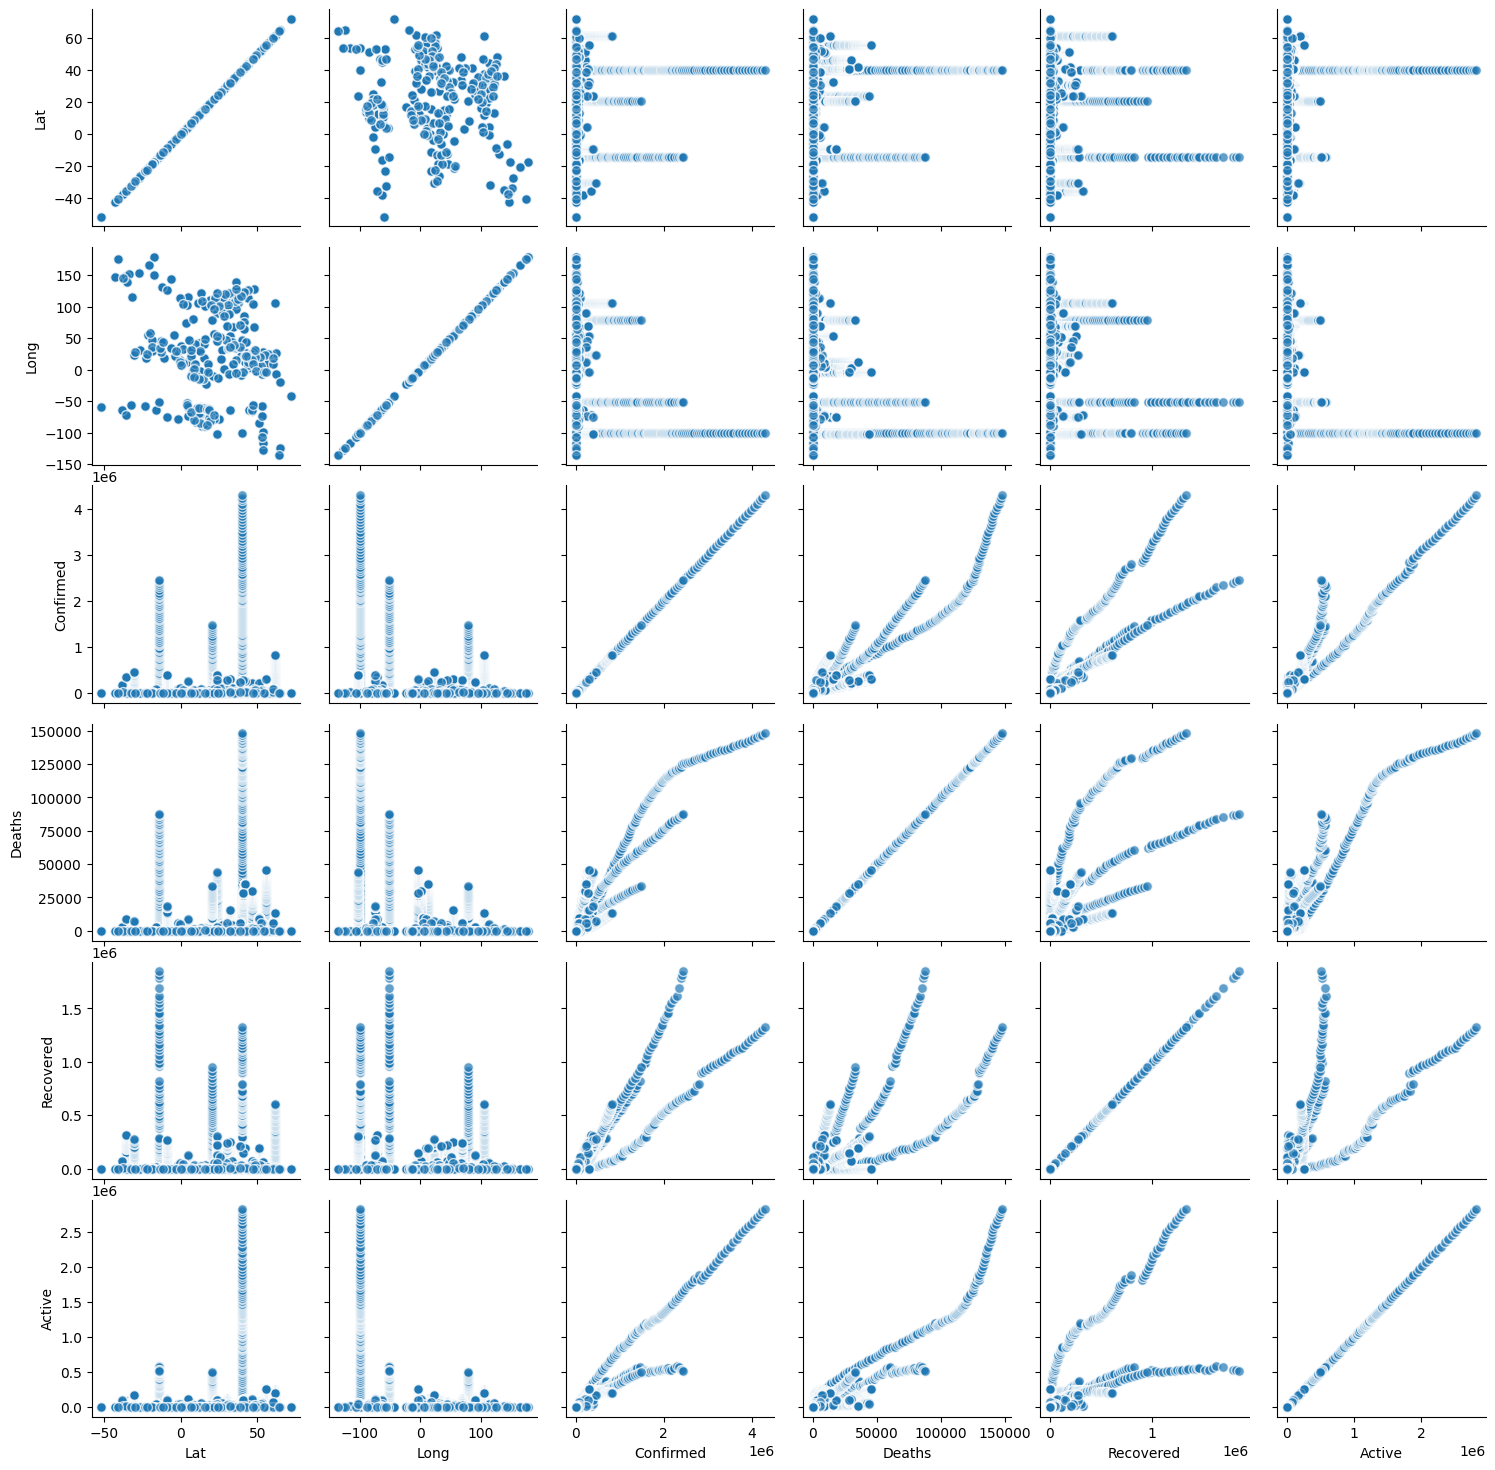

In [18]:
grid = sns.PairGrid(df) # We define a pair grid object from the dataframe and then plot the scatter plot
grid.map(func=plt.scatter, # Function plt.scatter
         s=50, # marker sizeb
         edgecolor='w', # edge color is white
         alpha=0.7) # Alpha in plotting means the intensity of color,We plot the scatter plot as .map has the func and the args

Insights:

- Positive correlation between confirmed and deaths (looks like highly positive) - recovered and activate
- Long/Lat does not have any relation

Q&A:
- Mariam: How to use functions and what to write?
    - Pandas, Numpy, Matplotlib, Seaborn
        - .read_csv() > Importing Data
        - .head(), .tail(), .sample(), .info(), .describe() > Data Understanding + Documentation
        - .drop(), .to_datetime(), .duplicated() > Data Preparation + Documention
        - .PairGrid(), .map(), .scatter(), .select_dtypes() > EDA + Documentation
- Ali: Documentation if I have missing documentation for example Kaggle dataset without any information?
    - Assessing the data: 
        - df.info() - Memory - Columns Datatypes - Number of cols/rows - NonNull and null
        - df.describe() - Numerical insights + Documentation
        - If the name of the column is not clear: Search on the internet for each column name + Document (Unit)
- Ali: We did not use df.duplicated() till now?
    - The current dataframe is already clean of duplicates.
- Ali: Data visualization?
    - PairGrid we draw all columns together in pair (Scatter plot)
- Abdelrahman & Mahmoud: Exam?
    - On Paper: Gradient Descent
    - On PC: DS Lifecycle till the PairGrid
- Abdelrahman:
    - How do we document on paper?
        - Documentation of gradient descent (J loss function vs alpha)
- Omar:
    - Gradient Descent (What about Sita)?
        - Can increase or can decrease

- Since our interest is the number of deaths, let's see the features that affect the number of deaths
    - From visualization I can see there is strong +ve relation between Deaths and Active/Confirmed/Recovered
    - Next step let's see the correlation map

# Lab Week 5: Continue the Machine Learning Lifecycle: Data visualization, Data Normalization and ML Modelling

- What is correlation?
    - It is a measurement between multiple features, 
        - its number if highly positive (positive correlation)
        - if highly negative (negatice correlation)
        - if near 0 then no correlation
        - Range from (-1,1)

<img src = 'basic_modelling1.png'>

- Q&A:
    - Why in model prediction I didn't add Y_pred?
        - Y_pred is the output of the model predict, the model predict function only takes the X_test to start providing a predicted value.
    - Difference between data cleaning (at preparation) and data manipulation (in Feature engineering)
        - The data cleaning is a must, since the model won't work unless we have a clean data (handling missing values, column types and tidiness)
        - The data manipulation in feature engineering is totally based on your insights (this can cause the model to learn fast)

In [19]:
CorrMatrix = df.drop(['Country/Region','WHO Region','Date'],axis = 1).corr()

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]),
 [Text(0, 0.5, 'Lat'),
  Text(0, 1.5, 'Long'),
  Text(0, 2.5, 'Confirmed'),
  Text(0, 3.5, 'Deaths'),
  Text(0, 4.5, 'Recovered'),
  Text(0, 5.5, 'Active')])

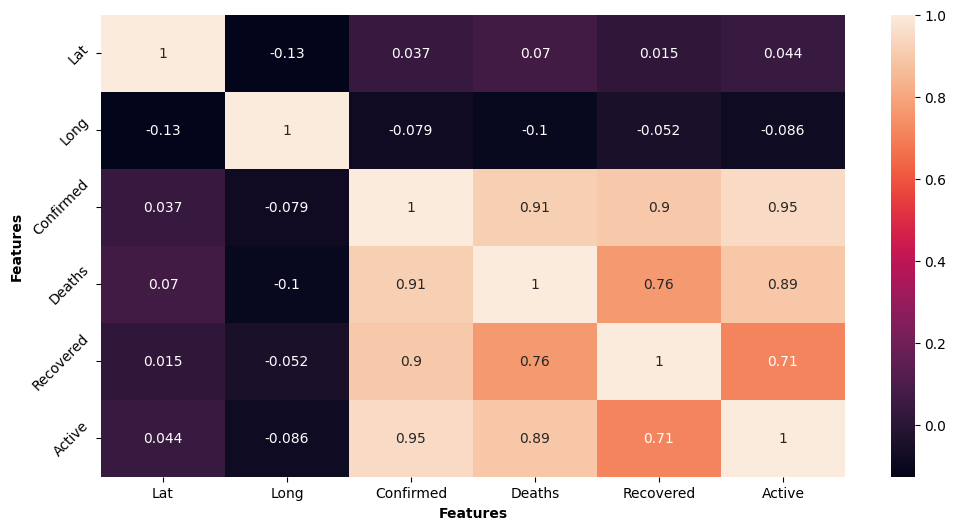

In [20]:
plt.figure(figsize = (12,6))
sns.heatmap(data = CorrMatrix,
            annot = True) # CorrMatrix
plt.ylabel("Features", fontweight = 'bold')
plt.xlabel("Features", fontweight = 'bold')
plt.yticks(rotation = 45)

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]),
 [Text(0, 0.5, 'Lat'),
  Text(0, 1.5, 'Long'),
  Text(0, 2.5, 'Confirmed'),
  Text(0, 3.5, 'Deaths'),
  Text(0, 4.5, 'Recovered'),
  Text(0, 5.5, 'Active')])

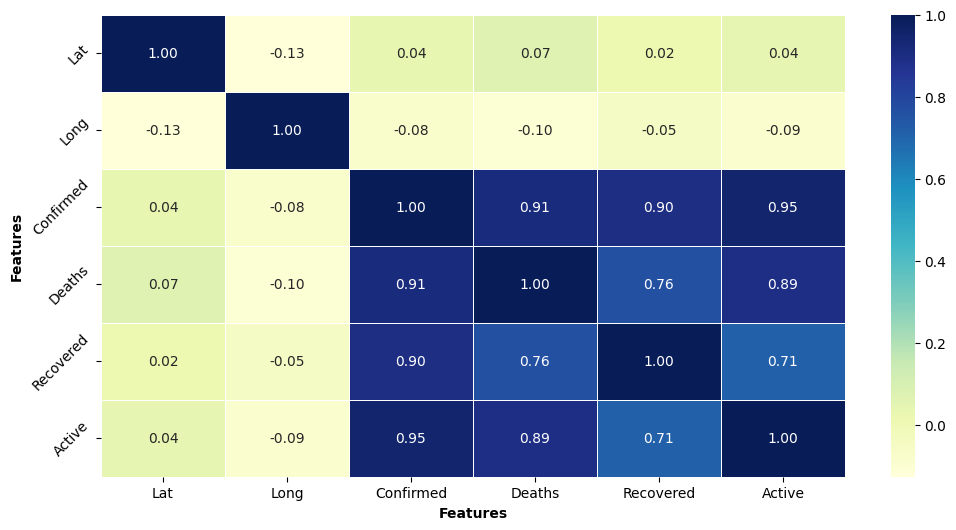

In [21]:
plt.figure(figsize=[12,6])
sns.heatmap(df.select_dtypes(include=['int64', 'float64']).corr(),
            annot=True,
            fmt=".2f", cmap="YlGnBu",
            linewidths=0.5)
plt.ylabel("Features", fontweight = 'bold')
plt.xlabel("Features", fontweight = 'bold')
plt.yticks(rotation = 45)

- Q&A:
    - Do you remember the goal?
        - Predict the number of death (globally) in the next period
    - Do my data allow me to do this directly? (We have each country, and its number of death per day)
        - Therefore, we use GROUP_BY function to sum up all records (countries) per day

- What do you see in that correlation matrix?
    - Is our initial theory validated about the number of death we have seen visually?
    - Your answer

df.groupby('Country/Region')['Deaths'].sum() # Should not be considered

In [22]:
df.groupby('Date')[['Deaths']].mean() # Is the sum the only metric we can acquire?
# The mean here is: the summation of all countries death per day/ number of countries

,Deaths
Date,
2020-01-22,0.065134
2020-01-23,0.068966
2020-01-24,0.099617
2020-01-25,0.160920
2020-01-26,0.214559
...,...
2020-07-23,2427.226054
2020-07-24,2450.766284
2020-07-25,2469.413793


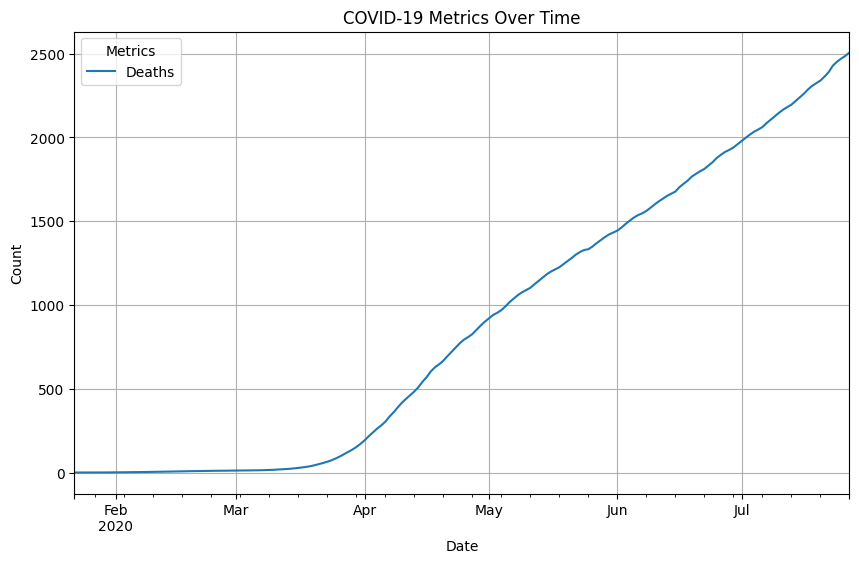

In [23]:
df_grouped = df.groupby('Date')[['Deaths']].mean() # Group the data by date and sum the values for each  ( + index by date)

# Plot all the metrics on the same axes
df_grouped.plot(figsize=(10,
                         6)) # plt.plot!
plt.xlabel("Date")
plt.ylabel("Count")
plt.title("COVID-19 Metrics Over Time")
plt.legend(title="Metrics")
plt.grid()
plt.show()

- Q&A:
    - How did I plot directly the df_grouped without distinguishing both features? (In other words, the index)
        - df grouped alread provided the date as the index

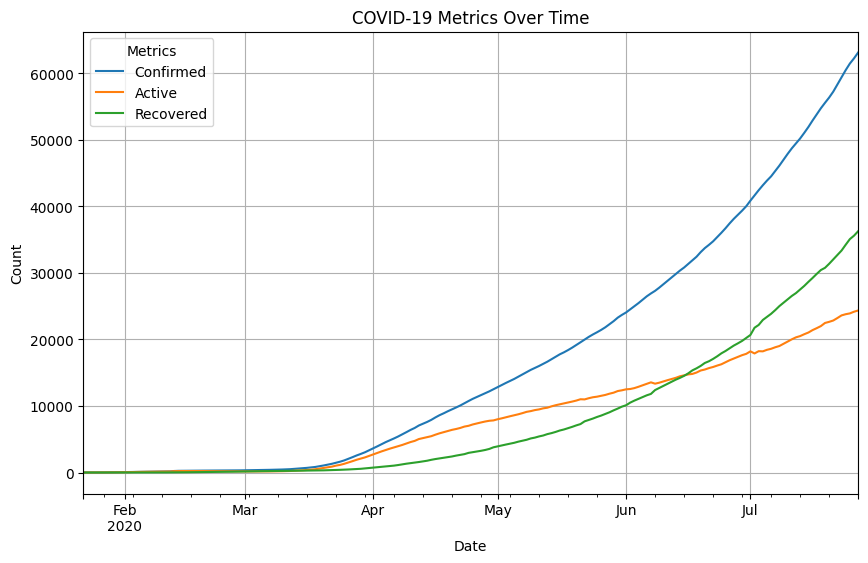

In [24]:
df_grouped = df.groupby('Date')[['Confirmed', 'Active', 'Recovered']].mean() # Group the data by date and sum the values for each metric

# Plot all the metrics on the same axes
df_grouped.plot(figsize=(10,
                         6))
plt.xlabel("Date") # label of x axis
plt.ylabel("Count") # label of y axis
plt.title("COVID-19 Metrics Over Time") # plt.tile covid 19
plt.legend(title="Metrics") # legends
plt.grid()
plt.show()


- Q&A:

    -  Why did I decide to use Date as a predictor?
        - Since our goal is to predict the number of deaths after some period of time
        - Due to the chart above, we can notice that since March there was an inflection point and then a linear relation between the date and the mean of each feature (Confirmed, Deaths, Recovered, Active)

- I can see that between March & April was a rising point for Covid-19

What about adding the date as a feature later on? (The date hence can be used as a predictor)

# Feature Engineering

- Let's extract important features out of date

In [25]:
# Extract useful numerical features from Date
df['Year'] = df['Date'].dt.year # Year
df['Month'] = df['Date'].dt.month # Month
df['Day'] = df['Date'].dt.day # Day
df['DayOfWeek'] = df['Date'].dt.weekday # Weekday?? - weekday index each week
df['WeekOfYear'] = df['Date'].dt.isocalendar().week # Index of the week per year
df['DaysSinceStart'] = (df['Date'] - df['Date'].min()).dt.days # Days Difference since start of Covid19 epidemic The most imporant

- Q&A:
    - DaysSinceStart is it a column a new column?
        - Yes this is a type of feature engineering (Feature Extraction)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Country/Region  49068 non-null  object        
 1   Lat             49068 non-null  float64       
 2   Long            49068 non-null  float64       
 3   Date            49068 non-null  datetime64[ns]
 4   Confirmed       49068 non-null  int64         
 5   Deaths          49068 non-null  int64         
 6   Recovered       49068 non-null  int64         
 7   Active          49068 non-null  int64         
 8   WHO Region      49068 non-null  object        
 9   Year            49068 non-null  int32         
 10  Month           49068 non-null  int32         
 11  Day             49068 non-null  int32         
 12  DayOfWeek       49068 non-null  int32         
 13  WeekOfYear      49068 non-null  UInt32        
 14  DaysSinceStart  49068 non-null  int64         
dtypes:

Text(0.5, 1.0, 'The whole data including the country/region deaths each day')

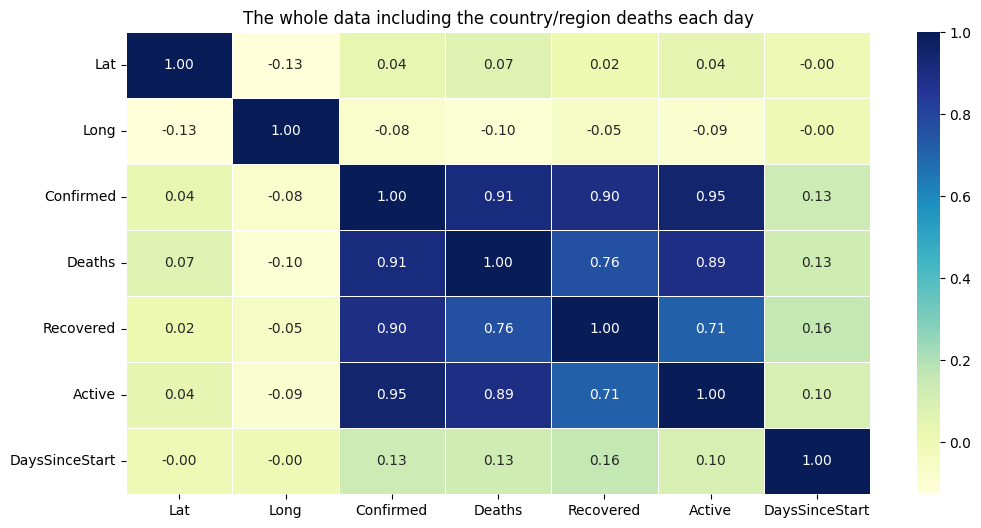

In [27]:
plt.figure(figsize=[12,6])
sns.heatmap(df.select_dtypes(include=['int64', 'float64']).corr(),
            annot=True,
            fmt=".2f", cmap="YlGnBu",
            linewidths=0.5)
plt.title("The whole data including the country/region deaths each day")

- Q&A:
    - Why did I plot again the correlation matrix?
        - Since the development lifecycle we used to develop, we recreated/modified features, hence we need to re-plot in order to see the correlation, in this case the DaysSinceStart

In [28]:
GROUPPED_DATA = df.groupby('Date')[['Deaths','Confirmed','DaysSinceStart','Active','Recovered']].mean().reset_index(drop=True)

Text(0.5, 1.0, 'While Groupped By')

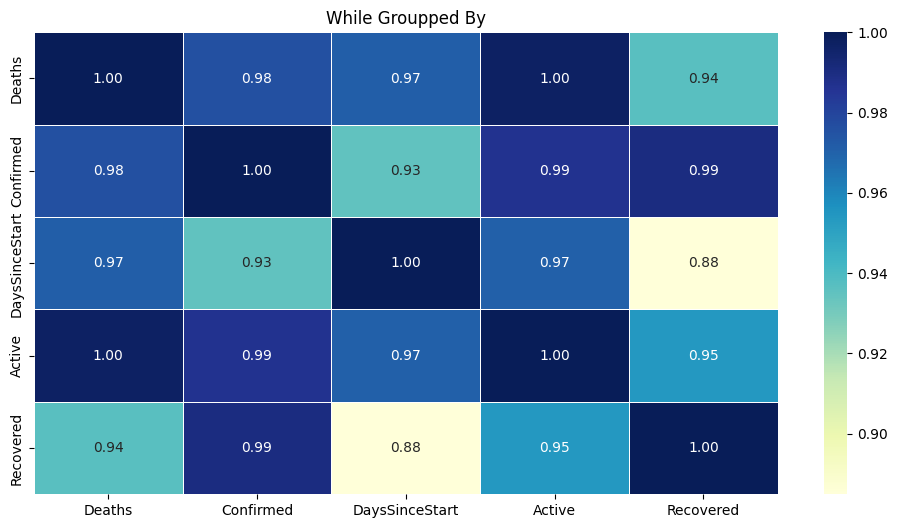

In [29]:

plt.figure(figsize=[12,6])
sns.heatmap(GROUPPED_DATA.corr(),
            annot=True,
            fmt=".2f", cmap="YlGnBu",
            linewidths=0.5)
plt.title("While Groupped By")

- Q&A:
    - Why did we select test size = 0.2?
        - Your Answer?
    - Why did I do shuffle = False?
        - Your Answer?

- Documentation!

- Q&A:
    - Why did we choose Z-Score normalization and not other normalizers?
        - Your Answer
    - Training vs Test at fit&transform or transform
    - Why did we use dataframe

- Q&A:
    - Why did we plot the correlation matrix with Group By once more?
        - Your Answer ()

- Now the latest correlation Matrix validated the date relations we have acquired so far on Death/Confirmed/Recovered/Active


- Now based on what we had so far, we should already have gained sufficient understanding about the data
- Next step is doing Feature Engineering based on what we have from data in order to establish the ML model.
    - Remember the ML Model objective is to: Predict the daily number of death for the next 15 days (GLOBALLY) hence the data should be grouped by date.

In [30]:
ML_data = df.groupby('Date')[['Confirmed', 'Active', 'Recovered','Deaths','DaysSinceStart']].mean() # Group the data by date and sum the values for each metric

In [31]:
ML_data # Let's drop the date since it is not a feature we already gathered the feature required DaysSinceStart

,Confirmed,Active,Recovered,Deaths,DaysSinceStart
Date,,,,,
2020-01-22,2.126437,1.954023,0.107280,0.065134,0.0
2020-01-23,2.505747,2.321839,0.114943,0.068966,1.0
2020-01-24,3.605364,3.367816,0.137931,0.099617,2.0
2020-01-25,5.494253,5.183908,0.149425,0.160920,3.0
2020-01-26,8.114943,7.701149,0.199234,0.214559,4.0
...,...,...,...,...,...
2020-07-23,59427.130268,23624.544061,33375.360153,2427.226054,183.0
2020-07-24,60504.386973,23801.877395,34251.743295,2450.766284,184.0
2020-07-25,61483.486590,23923.103448,35090.969349,2469.413793,185.0


In [32]:
ML_data.reset_index(drop=True, # I am dropping current index ("Date")
                    inplace=True # Commit!
                    )

## Data Splitting and Normalization (Standardization using Z-Score)

For each feature Xi it should be normalized using Z-Score in order to achieve 0 Mean and 1 Standard Deviation for each feature.
This step is helpful to reduce model complexity during training and also increase the time efficiency.
Xinew = (Xiold - Mean of feature X)/(Standard Deviation of Feature X)

We already knew that the features will be all columns except the Deaths (Which will be the target variable or the actual output to be predicted)

In [33]:
ML_data.describe()

,Confirmed,Active,Recovered,Deaths,DaysSinceStart
count,188.000000,188.000000,188.000000,188.000000,188.000000
mean,16884.904255,8085.011617,7915.713479,884.179160,93.500000
std,18229.840316,7546.630075,10068.875077,834.977372,54.415071
min,2.126437,1.954023,0.107280,0.065134,0.000000
25%,429.850575,224.681034,231.575670,15.076628,46.750000
50%,10914.685824,7125.513410,3006.835249,782.337165,93.500000
75%,28436.955939,13743.353448,13089.638889,1603.963602,140.250000
max,63143.620690,24361.540230,36276.195402,2505.885057,187.000000


In [34]:
from sklearn.preprocessing import StandardScaler as SC # Importing the standard scaler
from sklearn.model_selection import train_test_split as TTSPlit # For Data splitting

In [35]:
X = ML_data[['Confirmed', 'Active', 'Recovered','DaysSinceStart']] # Input/Features
y = ML_data['Deaths'] # Target/Output

In [36]:
y

0         0.065134
1         0.068966
2         0.099617
3         0.160920
4         0.214559
          ...     
183    2427.226054
184    2450.766284
185    2469.413793
186    2485.137931
187    2505.885057
Name: Deaths, Length: 188, dtype: float64

In [37]:
X.shape

(188, 4)

In [38]:
X_train, X_test, y_train, y_test = TTSPlit(X, y, train_size = 0.8,shuffle=False) # We need last 38 days for testing

In [39]:
# Let's scale/normalize the feautres
scaler = SC() # Instantiating the scaler
scaler.fit(X_train) # Fitting the scaler

StandardScaler()

In [40]:
X_train_normalized = scaler.transform(X_train)

In [41]:
X_train_normalized.mean(), X_train_normalized.std()

(5.921189464667501e-17, 1.0)

In [42]:
X_test_nomralized = scaler.transform(X_test)

In [43]:
pd.DataFrame(X_train_normalized, columns = ['Confirmed', 'Active', 'Recovered','DaysSinceStart']).describe()
# the data is normalized, the mean of each feature is 0 and the STD(standard devation) is 1

,Confirmed,Active,Recovered,DaysSinceStart
count,1.500000e+02,1.500000e+02,1.500000e+02,150.000000
mean,9.473903e-17,9.473903e-17,1.421085e-16,0.000000
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350
min,-9.098698e-01,-1.000856e+00,-7.747736e-01,-1.720542
25%,-8.782707e-01,-9.621865e-01,-7.440536e-01,-0.860271
50%,-4.168698e-01,-2.838818e-01,-5.508605e-01,0.000000
75%,7.309075e-01,8.908759e-01,4.983636e-01,0.860271
max,2.369211e+00,1.984460e+00,2.791984e+00,1.720542


## Machine Learning Algorithm Linear Regression

In [49]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import r2_score, mean_absolute_error
# Import

In [45]:
model = LR() # Instantiating the model
model.fit(X_train_normalized, y_train) # Fitting the model

LinearRegression()

In [46]:
y_pred = model.predict(X_test_nomralized) # predict

In [47]:
MAE = mean_absolute_error(y_test, y_pred) # Evaluate
R2 = r2_score(y_test, y_pred) # Coefficient of Determination (Accuracy)

In [100]:
MAE,R2

(2.961841298536839e-12, 1.0)

- As shown, the model shows high R2 Score suggesting that the prediction of the death is correct.
- The MAE is near 0 which reflects the model accuracy

In [101]:
df_eval = pd.DataFrame(data = y_test)
df_eval['Predicted'] = y_pred

In [102]:
df_eval

,Deaths,Predicted
150,1782.459770,1782.459770
151,1797.643678,1797.643678
152,1811.325670,1811.325670
153,1831.674330,1831.674330
154,1851.831418,1851.831418
155,1877.222222,1877.222222
156,1895.716475,1895.716475
157,1912.904215,1912.904215
158,1924.739464,1924.739464
159,1938.996169,1938.996169


- Q&A:
    - What should be done next after evaluating?
        - DOCUMENTATION!!!
    - What is R2 Score:
        - This score is used to measure how well the y_test and y_pred are aligned/correlated
            - The y_pred is correct

- Summary:
    - Heatmap (Correlation between features)
    - Data Normalization (and Splitting)
    - Model Build/Fit/Predict/Evaluate
    - Documentation!!!

In [104]:
ML_data

,Confirmed,Active,Recovered,Deaths,DaysSinceStart
0,2.126437,1.954023,0.107280,0.065134,0.0
1,2.505747,2.321839,0.114943,0.068966,1.0
2,3.605364,3.367816,0.137931,0.099617,2.0
3,5.494253,5.183908,0.149425,0.160920,3.0
4,8.114943,7.701149,0.199234,0.214559,4.0
...,...,...,...,...,...
183,59427.130268,23624.544061,33375.360153,2427.226054,183.0
184,60504.386973,23801.877395,34251.743295,2450.766284,184.0
185,61483.486590,23923.103448,35090.969349,2469.413793,185.0
186,62267.417625,24175.137931,35607.141762,2485.137931,186.0


In [48]:
ML_data

,Confirmed,Active,Recovered,Deaths,DaysSinceStart
0,2.126437,1.954023,0.107280,0.065134,0.0
1,2.505747,2.321839,0.114943,0.068966,1.0
2,3.605364,3.367816,0.137931,0.099617,2.0
3,5.494253,5.183908,0.149425,0.160920,3.0
4,8.114943,7.701149,0.199234,0.214559,4.0
...,...,...,...,...,...
183,59427.130268,23624.544061,33375.360153,2427.226054,183.0
184,60504.386973,23801.877395,34251.743295,2450.766284,184.0
185,61483.486590,23923.103448,35090.969349,2469.413793,185.0
186,62267.417625,24175.137931,35607.141762,2485.137931,186.0


In [ ]:
ML_data.to_csv("ML_DATA_V1.csv", # Saving the last data file
               index = False) # why index = false

In [110]:
ML_data

,Confirmed,Active,Recovered,Deaths,DaysSinceStart
0,2.126437,1.954023,0.107280,0.065134,0.0
1,2.505747,2.321839,0.114943,0.068966,1.0
2,3.605364,3.367816,0.137931,0.099617,2.0
3,5.494253,5.183908,0.149425,0.160920,3.0
4,8.114943,7.701149,0.199234,0.214559,4.0
...,...,...,...,...,...
183,59427.130268,23624.544061,33375.360153,2427.226054,183.0
184,60504.386973,23801.877395,34251.743295,2450.766284,184.0
185,61483.486590,23923.103448,35090.969349,2469.413793,185.0
186,62267.417625,24175.137931,35607.141762,2485.137931,186.0
